# Netflix: Exploratory Data Analysis 

In this notebook we perform some exploratory data analysis to answer Netflix related questions. Netflix is one of the leading streaming platforms in the world, with a diverse catalog encompassing movies and series for different audiences. Data visualization will be highly used to give insights of the data. The dataset is available on [Kaggle](https://www.kaggle.com/datasets/shivamb/netflix-shows)

## Dataset Cleaning

We first import some useful modules for the datavisualization and analysis

In [1]:
import pandas as pd               # data cleaning and analysis
import matplotlib.pyplot as plt   # visualization
import seaborn as sns             # visualization
import numpy as np
import plotly.express as px
import matplotlib

Let's start by getting some information of the dataset

In [2]:
df = pd.read_csv('netflix_titles.csv')  # reading the csv file
df.info()                               # getting info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


As we can see there are some missing data from the dataset, e.g. `director` or `cast`. Let's get an idea of the percentage of missing data. 

In [3]:
100*(df.isna().sum()/len(df)).to_frame(name="percentage missing data").round(4)


,percentage missing data
show_id,0.00
type,0.00
title,0.00
director,29.91
cast,9.37
country,9.44
date_added,0.11
release_year,0.00
rating,0.05
duration,0.03


Most of the data missing concerns the attribute `director` (roughly 30%), `cast` and `country` (roughly 9.5%). We will not use `director` (or `cast`) information during our analysis, hence we can leave it as it is, and do not erase the empty rows. This is done to preserve the integrity of the dataset, and to not miss any valuable information. We will use `country` information, but we will keep (for same reason as above) empty rows.

Notice that, before proceding in the visualization, the date should be changed. In particular, we want to add some columns to know when a movie is added (month, year).

In [4]:
df["date_added"] = pd.to_datetime(df['date_added'])
df['month_added'] = df['date_added'].dt.month
df['month_name_added'] = df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year


Great, now also date is okay! Let's start with some visualizations.

## Visualizations

We will striclty focus on answering three questions:

* Question 1
* Question 2
* Question 3

Notice that where possible, we will use Netflix colorscheme palette and font type. Nice tip from this [website](https://www.kaggle.com/code/joshuaswords/netflix-data-visualization).

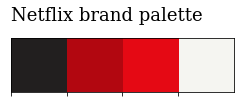

In [5]:
sns.palplot(['#221f1f', '#b20710', '#e50914', '#f5f5f1'])  # palette

plt.title("Netflix brand palette ", loc='left',
          fontfamily='serif', fontsize=18, y=1.2)
plt.show()
 

### Questions

1. Which thems are more appealing for netflix users? And in what format? (bar plot)
2. What are the most themes for each country production? (grafico con connessioni)
3. small multiples paesi con time

### Viz 1

In [6]:
# Generate the dataset

df['genre'] = df['listed_in'].apply(
    lambda x:  x.replace(' ,', ',').replace(', ', ',').split(','))
Types = []
for i in df['genre']:
    Types += i
    
unique_genres = list(set(Types))
# create new df
tmp = pd.DataFrame(unique_genres)
tmp.columns = ["genres"]
tmp["genres"] = tmp["genres"].apply(
    lambda x:  x.replace('TV Shows', '').replace(' TV Shows', '').replace(' TV Shows ', '').replace('TV Shows ', '').replace(' TV', '').replace(' TV ', '').replace('TV ', ''))
tmp["genres"] = tmp["genres"].apply(
    lambda x:  x.replace(' Movies', '').replace(
        ' Movies ', '').replace('Movies ', '').replace('Movies', '').replace(' Series', '').replace(
        ' Series ', '').replace('Series ', ''))
tmp["genres"] = tmp["genres"].apply(lambda x:  x.replace(' ', ''))
unique_genres = tmp.dropna()["genres"].unique()[1:]
genres_df = pd.DataFrame(unique_genres)
genres_df.columns = ["genres"]
empty = np.zeros(len(genres_df))
genres_df["movies"] = empty
genres_df["tv"] = empty
df['genre_split'] = df['listed_in'].apply(
    lambda x:  x.replace(' ,', ',').replace(', ', ',').replace(' ', ',').split(','))


def contains_word(s, w):
    a = (' ' + w) in (' ' + s)
    return a


for tidx, type_ in enumerate(genres_df['genres']):
    movies = 0
    tv = 0
    for idx, i in enumerate(df['genre_split']):
        for word in i:
            if word == 'Docuseries':
                word = 'Documentaries'
            if word == "Kids'":
                word = 'Children&Family'
            if word == 'Thrillers':
                word = 'Crime'

            if contains_word(type_, word):
                if df["type"][idx] == 'Movie':
                    movies += 1
                else:
                    tv += 1

    genres_df["movies"][tidx] = movies
    genres_df["tv"][tidx] = tv

genres_df['tot_count'] = genres_df['movies']+genres_df['tv']
genres_df['percentage_movies'] = (
    genres_df['movies'] / genres_df['tot_count']) 
genres_df['percentage_tv'] = (genres_df['tv'] / genres_df['tot_count'])
genres_df = genres_df.sort_values('tot_count', ascending=False).dropna()
tmp



/var/folders/k7/4r6y5q6904j1f009bpqwhy380000gn/T/ipykernel_7252/158690912.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genres_df["movies"][tidx] = movies
/var/folders/k7/4r6y5q6904j1f009bpqwhy380000gn/T/ipykernel_7252/158690912.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genres_df["tv"][tidx] = tv


,genres
0,Horror
1,British
2,Comedies
3,Classic&Cult
4,Crime
5,Comedies
6,Children&Family
7,Documentaries
8,Classic
9,Science&Nature


In [7]:
df = genres_df[:8]
data_q2q3_ratio = pd.DataFrame(df['genres'])
data_q2q3_ratio.columns = ["type"]
data_q2q3_ratio["Movie"] = df['percentage_movies']
data_q2q3_ratio["TV Show"] = df['percentage_tv']


In [8]:
data_q2q3_ratio = data_q2q3_ratio.sort_values("Movie", ascending=True)
data_q2q3_ratio = data_q2q3_ratio.set_index('type')


In [9]:
# fig, ax = plt.subplots(1,1,figsize=(15, 8),)

# ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Movie'], 
#         color='#b20710', alpha=0.8, label='Movie')
# ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['TV Show'], left=data_q2q3_ratio['Movie'], 
#         color='#221f1f', alpha=0.8, label='TV Show')


# ax.set_xlim(0, 1)
# ax.set_xticks([])
# ax.set_yticklabels(data_q2q3_ratio.index, fontfamily='serif', fontsize=11)

# # male percentage
# for i in data_q2q3_ratio.index:
#     ax.annotate(f"{data_q2q3_ratio['Movie'][i]*100:.3}%", 
#                    xy=(data_q2q3_ratio['Movie'][i]/2, i),
#                    va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
#                    color='white')

# for i in data_q2q3_ratio.index:
#     ax.annotate(f"{data_q2q3_ratio['TV Show'][i]*100:.3}%", 
#                    xy=(data_q2q3_ratio['Movie'][i]+data_q2q3_ratio['TV Show'][i]/2, i),
#                    va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
#                    color='white')
    

# fig.text(0.13, 0.93, 'Top 8 genre for Movie & TV Show split', fontsize=18, fontweight='bold', fontfamily='serif')   
# fig.text(0.131, 0.89, 'Percent Stacked Bar Chart', fontsize=14,fontfamily='serif')   

# for s in ['top', 'left', 'right', 'bottom']:
#     ax.spines[s].set_visible(False)
    
# #ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))

# fig.text(0.75,0.9,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
# fig.text(0.81,0.9,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
# fig.text(0.82, 0.9, "TV Show", fontweight="bold",
#          fontfamily='serif', fontsize=15, color='#221f1f')




# import matplotlib.lines as lines
# l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='white',lw=0.2)
# fig.lines.extend([l1])




# ax.tick_params(axis='both', which='major', labelsize=12)
# ax.tick_params(axis=u'both', which=u'both',length=0)


# plt.savefig("fig1.pdf", dpi=400)

### Viz2

In [10]:
#10 paesi con più prodotti

from collections import Counter
df2 = pd.read_csv('netflix_titles.csv')  # reading the csv file
df2=df2.dropna(subset=['country'])

df2['temp'] = df2['country'].apply(
    lambda x:  x.replace(' ,', ',').replace(', ', ',').replace(' , ', ',').split(','))
Countries = []
for i in df2['temp']:
    Countries += i
unique_countries = list(set(Countries))
countries_df = pd.DataFrame(unique_countries)
countries_df.columns = ["countries"]
conta = [item[0] for item in Counter(Countries).most_common(10)]
countries_df = pd.DataFrame(conta)
countries_df.columns = ["countries"]
count_most_producers = dict(Counter(Countries))
country_most_producers = sorted(count_most_producers,
                        key=count_most_producers.get, reverse=True)



In [11]:
import plotly.graph_objects as go
import plotly.express as pex


In [12]:
df = pd.read_csv('netflix_titles.csv')
# Replacments

df['country'] = df['country'].fillna(df['country'].mode()[0])


df['cast'].replace(np.nan, 'No Data', inplace=True)
df['director'].replace(np.nan, 'No Data', inplace=True)

# Drops

df.dropna(inplace=True)

# Drop Duplicates

df.drop_duplicates(inplace=True)


In [13]:
# useful functions 

import pycountry_convert as pc

def check_state(a):
    if a == '':
        a = None
    if a == 'West Germany' or a == 'East Germany':
        a = 'Germany'
    if a == 'Soviet Union':
        a = 'Russia'
    if a == 'Vatican City':
        a = 'Italy'
    return a


def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(
        country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(
        country_continent_code)
    return country_continent_name


In [14]:
# get the countries
new_df = df[['type', 'country']]
new_df['country'] = new_df['country'].apply(lambda x: x.split(",")[0])
new_df['country'] = new_df['country'].apply(check_state)
new_df.dropna(inplace=True)
new_df['continent'] = new_df['country'].apply(country_to_continent)

# grouping by
new_df = new_df.groupby(["type", "country", "continent"]
               ).size().reset_index(name="count")


/var/folders/k7/4r6y5q6904j1f009bpqwhy380000gn/T/ipykernel_7252/3238992899.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['country'] = new_df['country'].apply(lambda x: x.split(",")[0])
/var/folders/k7/4r6y5q6904j1f009bpqwhy380000gn/T/ipykernel_7252/3238992899.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['country'] = new_df['country'].apply(check_state)
/usr/local/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a c

In [15]:
categories = ['type', 'continent', 'country']
new_df_top = new_df[new_df['count'] > 35]
newDf = pd.DataFrame()
for i in range(len(categories)-1):
    tempDf = new_df_top[[categories[i], categories[i+1], 'count']]
    tempDf.columns = ['source', 'target', 'count']
    newDf = pd.concat([newDf, tempDf])
newDf = newDf.groupby(['source', 'target']).agg({'count': 'sum'}).reset_index()

label_list = list(np.unique(new_df_top[categories].values))
source = newDf['source'].apply(lambda x: label_list.index(x))
target = newDf['target'].apply(lambda x: label_list.index(x))
count = newDf['count']


In [16]:
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio


fig = go.Figure(
    data=[go.Sankey(
          arrangement="perpendicular",
        node={"label": label_list,
              'pad':20,
              'thickness':40,
              'color': '#b20710',},

        link={"source": source,
              "target": target,
              "value": count},
        visible=True,
        orientation="h")
          ])
fig.update_layout(title_text="<b>Movie and TV Show Netlix production</b><br><sup>United States, India and United Kingdom on the top three for Netflix content production.</sup>",
                  font_size=12,
                  title_font_size=20,
                  font_family='Droid Serif',
                  font_color='black',
                  title_font_family='Droid Serif',
                  title_font_color='black')
fig.update_layout(
    autosize=False,
    width=10 * 80,
    height=6.6 * 80,
)
fig.show()
pio.write_image(fig, 'yourImage.pdf')


### Viz3

In [17]:
# get the countries
new_df = df[['type', 'country', 'listed_in']]
new_df['country'] = new_df['country'].apply(lambda x: x.split(",")[0])
new_df['listed_in'] = new_df['listed_in'].apply(lambda x: x.split(",")[0])
new_df['country'] = new_df['country'].apply(check_state)
new_df.dropna(inplace=True)


/var/folders/k7/4r6y5q6904j1f009bpqwhy380000gn/T/ipykernel_7252/2639312558.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/k7/4r6y5q6904j1f009bpqwhy380000gn/T/ipykernel_7252/2639312558.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/k7/4r6y5q6904j1f009bpqwhy380000gn/T/ipykernel_7252/2639312558.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [18]:
new_df

,type,country,listed_in
0,Movie,United States,Documentaries
1,TV Show,South Africa,International TV Shows
2,TV Show,United States,Crime TV Shows
3,TV Show,United States,Docuseries
4,TV Show,India,International TV Shows
...,...,...,...
8802,Movie,United States,Cult Movies
8803,TV Show,United States,Kids' TV
8804,Movie,United States,Comedies
8805,Movie,United States,Children & Family Movies


In [19]:
df = pd.read_csv('netflix_titles.csv')
df['country'] = df['country'].fillna(df['country'].mode()[0])
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# Generate the dataset
df['country'] = df['country'].apply(lambda x: x.split(",")[0])
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(",")[0])
df['genre'] = df['listed_in']

df["genre"] = df["genre"].apply(
    lambda x:  x.replace('TV Shows', '').replace(' TV Shows', '').replace(' TV Shows ', '').replace('TV Shows ', '').replace(' TV', '').replace(' TV ', '').replace('TV ', ''))
df["genre"] = df["genre"].apply(
    lambda x:  x.replace(' Movies', '').replace(
        ' Movies ', '').replace('Movies ', '').replace('Movies', '').replace(' Series', '').replace(
        ' Series ', '').replace('Series ', ''))
df["genre"] = df["genre"].apply(lambda x:  x.replace(' ', ''))


new_df = df[['genre', 'country']].groupby(['genre', 'country']
                                 ).size().reset_index(name="count")

new_df = new_df[new_df['genre'] != '']
new_df = new_df[new_df['country'] != '']
top_country = new_df_top.sort_values(['count'], ascending=False)[
    'country'].unique().tolist()[:9]
new_df = new_df[new_df['country'].isin(top_country)].sort_values([
    'count'], ascending=False)


/var/folders/k7/4r6y5q6904j1f009bpqwhy380000gn/T/ipykernel_7252/1825122989.py:25: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/k7/4r6y5q6904j1f009bpqwhy380000gn/T/ipykernel_7252/1825122989.py:25: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/k7/4r6y5q6904j1f009bpqwhy380000gn/T/ipykernel_7252/1825122989.py:25: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/k7/4r6y5q6904j1f009bpqwhy380000gn/T/ipykernel_7252/1825122989.py:25: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/k7/4r6y5q6904j1f009bpqwhy380000gn/T/ipykernel_7252/1825122989.py:25: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/k7/4r6y5q6904j1f009bpqwhy380000gn/T/ipykernel_7252/1825122989.py:25: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/k7/4r6y5q6904j1f009bpqwhy380000gn

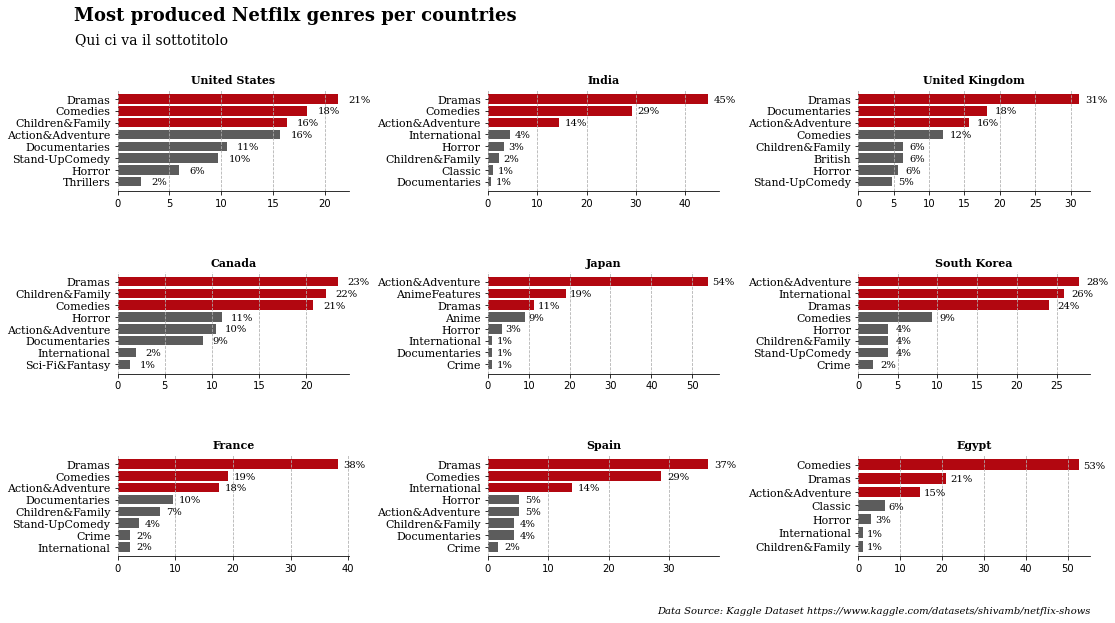

In [104]:
fig, axes = plt.subplots(figsize=(15, 8), nrows=3, ncols=3)
axes = axes.ravel()

for i, country in enumerate(top_country):

    data = new_df[new_df['country'] == country][:8]
    data.sort_values('count', inplace=True)

    # for the colors
    colors = []
    alpha = []
    maxims = data['count'].values[data['count'].values.argsort()[-3:][::-1]]
    for value in data['count']:  # keys are the names of the boys
        if value in maxims:
            colors.append('#b20710')
        else:
            colors.append('#5C5C5C')

    ticks_label = 100*(data['count'].values/sum(data['count'].values))

    axes[i].barh(y=data['genre'], width=ticks_label,
                 color=colors, alpha=1)
    axes[i].set_title("{}".format(country), fontfamily='serif',
                      fontsize=11, fontweight='bold')
    axes[i].set_yticklabels(labels=data['genre'],
                            fontfamily='serif', fontsize=11)

    for s in ['top', 'left', 'right']:
        axes[i].spines[s].set_visible(False)

    axes[i].grid(which='major', axis='x', linestyle='--')

    count = 0
    for p in axes[i].patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        my_lab = ticks_label[count]/100
        count += 1
        axes[i].annotate(f'{my_lab:.0%}', (x + width + 1,
                         y + height - 0.65), ha='left', fontfamily='serif')



fig.text(0.06, 0.93, 'Most produced Netfilx genres per countries', fontsize=18, fontweight='bold', fontfamily='serif')
fig.text(0.061, 0.89, 'Qui ci va il sottotitolo', fontsize=14,fontfamily='serif')
fig.text(0.6, -0.1, 'Data Source: Kaggle Dataset https://www.kaggle.com/datasets/shivamb/netflix-shows',
         fontsize=10, fontfamily='serif', style='italic')
plt.subplots_adjust(left=0.1,
                    bottom=0.0,
                    right=1,
                    top=0.81,
                    wspace=0.6,
                    hspace=0.8)

plt.savefig("hey.pdf", bbox_inches='tight')
